In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from model_v2 import ANN

In [ ]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.rename(columns={'Chance of Admit ': 'Chance of Admit'}, inplace=True)
df['acceptance rate'] = df['Chance of Admit'].apply(lambda x: 2 if x >= 0.75 else 1 if x >= 0.60 else 0)
df.drop(columns=['Serial No.'], inplace=True)
df['acceptance rate'].value_counts()

acceptance rate
2    218
1    187
0     95
Name: count, dtype: int64

<Axes: xlabel='GRE Score', ylabel='acceptance rate'>

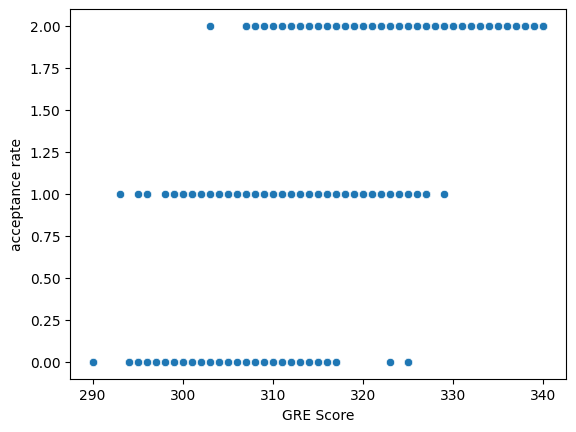

In [ ]:
sns.scatterplot(data=df, x="GRE Score", y="acceptance rate")

In [ ]:
# Split features and target variable
# X = df.iloc[:,0:-1]
# y = df.iloc[:,-1]
X = df.drop(columns=['acceptance rate', 'Chance of Admit'])
y = df['acceptance rate']

In [ ]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

encoder = OneHotEncoder(categories='auto')
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()

In [ ]:
# Defining neural network parameters
input_size = X_train_scaled.shape[1]
hidden_size = 32
output_size = len(encoder.categories_[0])
learning_rate = 0.1
epochs = 10000

# Training the neural network
ann_model = ANN(input_size, hidden_size, output_size, learning_rate)
ann_model.train(X_train_scaled, y_train_encoded, epochs)


Epoch 0: Accuracy 37.50%, Loss 0.4501
Epoch 1000: Accuracy 95.50%, Loss 0.0608
Epoch 2000: Accuracy 96.25%, Loss 0.0409
Epoch 3000: Accuracy 96.25%, Loss 0.0341
Epoch 4000: Accuracy 96.25%, Loss 0.0312
Epoch 5000: Accuracy 96.50%, Loss 0.0295
Epoch 6000: Accuracy 96.50%, Loss 0.0297
Epoch 7000: Accuracy 97.00%, Loss 0.0276
Epoch 8000: Accuracy 97.00%, Loss 0.0262
Epoch 9000: Accuracy 97.00%, Loss 0.0253


In [ ]:
# Making predictions on the test set
for i in range(len(X_test_scaled)):
    predicted = ann_model.forward_prop(X_test_scaled[i])
    predicted_class = np.argmax(predicted)
    actual_class = y_test.values[i]
    print(f"Predicted: {predicted_class}\tActual: {actual_class}")

Predicted: 2	Actual: 1
Predicted: 1	Actual: 2
Predicted: 2	Actual: 2
Predicted: 1	Actual: 0
Predicted: 2	Actual: 2
Predicted: 1	Actual: 1
Predicted: 2	Actual: 2
Predicted: 1	Actual: 1
Predicted: 2	Actual: 2
Predicted: 1	Actual: 1
Predicted: 1	Actual: 1
Predicted: 0	Actual: 1
Predicted: 2	Actual: 1
Predicted: 1	Actual: 1
Predicted: 2	Actual: 1
Predicted: 2	Actual: 2
Predicted: 1	Actual: 1
Predicted: 2	Actual: 2
Predicted: 2	Actual: 2
Predicted: 2	Actual: 2
Predicted: 1	Actual: 1
Predicted: 1	Actual: 2
Predicted: 2	Actual: 2
Predicted: 0	Actual: 0
Predicted: 2	Actual: 0
Predicted: 1	Actual: 0
Predicted: 2	Actual: 2
Predicted: 1	Actual: 0
Predicted: 2	Actual: 2
Predicted: 1	Actual: 1
Predicted: 1	Actual: 1
Predicted: 2	Actual: 2
Predicted: 0	Actual: 1
Predicted: 2	Actual: 2
Predicted: 1	Actual: 0
Predicted: 1	Actual: 2
Predicted: 1	Actual: 1
Predicted: 1	Actual: 1
Predicted: 1	Actual: 1
Predicted: 2	Actual: 2
Predicted: 0	Actual: 1
Predicted: 0	Actual: 1
Predicted: 1	Actual: 2
Predicted: 

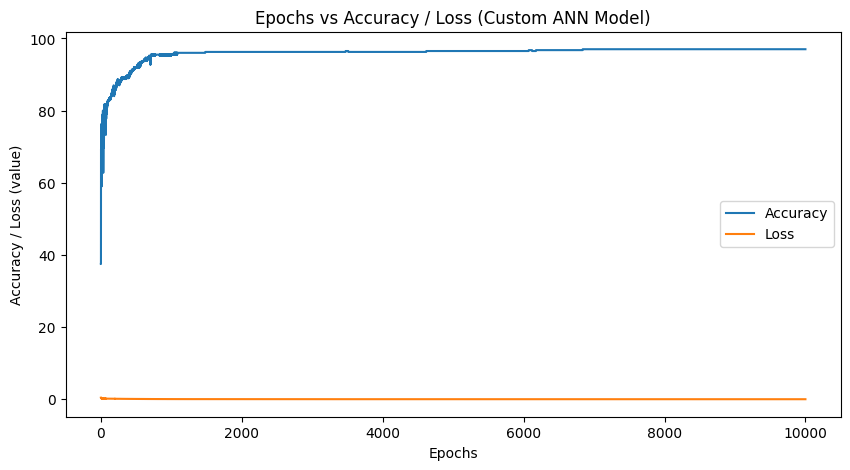

In [ ]:
# Plot accuracy and loss
ann_model.plot_accuracy_loss()

In [ ]:
# Build the sequential model
model = Sequential()
# Add input layer and hidden layers
model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(16, activation='relu'))

# Add output layer
model.add(Dense(3, activation='softmax'))  # 3 output nodes for 3 categories: Low, Medium, High

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(X_train_scaled, y_train, epochs=1000, batch_size=32, validation_split=0.1)


Epoch 1/1000


12/12 [==============================] - 1s 27ms/step - loss: 1.1715 - accuracy: 0.3028 - val_loss: 1.2276 - val_accuracy: 0.1500
Epoch 2/1000
12/12 [==============================] - 0s 8ms/step - loss: 1.0510 - accuracy: 0.3444 - val_loss: 1.0938 - val_accuracy: 0.1750
Epoch 3/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.9690 - accuracy: 0.4500 - val_loss: 0.9999 - val_accuracy: 0.4750
Epoch 4/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.9017 - accuracy: 0.6056 - val_loss: 0.9092 - val_accuracy: 0.6000
Epoch 5/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.8374 - accuracy: 0.6639 - val_loss: 0.8231 - val_accuracy: 0.6500
Epoch 6/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.7728 - accuracy: 0.7111 - val_loss: 0.7384 - val_accuracy: 0.7250
Epoch 7/1000
12/12 [==============================] - 0s 8ms/step - loss: 0.7155 - accuracy: 0.7278 - val_loss: 0.6589 - val_accuracy: 0.7500
Ep

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 835 (3.26 KB)
Trainable params: 835 (3.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 2.4814 - accuracy: 0.6900
Test Accuracy: 0.6899999976158142


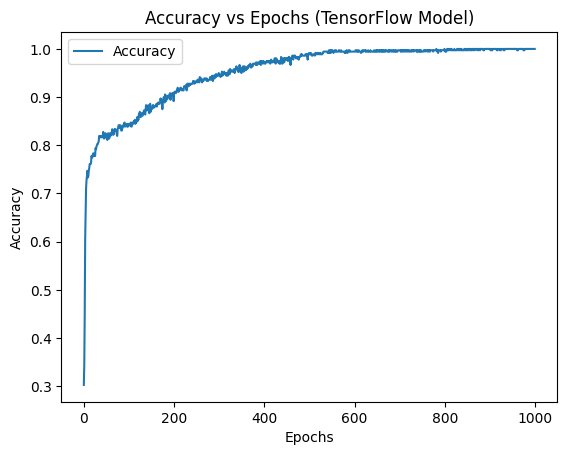

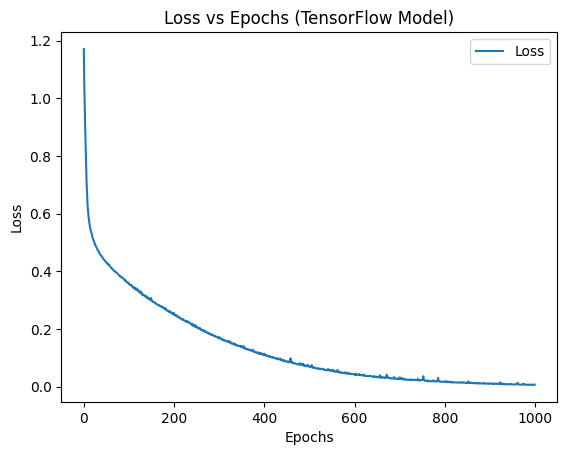

In [ ]:
# Plot epochs vs accuracy for TensorFlow model
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs (TensorFlow Model)')
plt.legend()
plt.show()

# Plot epochs vs loss for TensorFlow model
plt.plot(range(len(history.history['loss'])), history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs (TensorFlow Model)')
plt.legend()
plt.show()


In [ ]:
# Predict function
def predict_admission_chance(model, scaler):
    gre_score = float(input("Enter your GRE score: "))
    toefl_score = float(input("Enter your TOEFL score: "))
    university_rating = int(input("Enter your university rating (1-5): "))
    sop = float(input("Enter your Statement of Purpose score (0-1): "))
    lor = float(input("Enter your Letter of Recommendation score (0-1): "))
    cgpa = float(input("Enter your CGPA: "))
    research = int(input("Have you done any research? (1 for yes, 0 for no): "))

    input_data = np.array([gre_score, toefl_score, university_rating, sop, lor, cgpa, research]).reshape(1, -1)
    input_data_scaled = scaler.transform(input_data)

    prediction_sm = model.predict(input_data_scaled)
    predicted_class_sm = np.argmax(prediction_sm)

    prediction_ann_model = ann_model.forward_prop(input_data_scaled)
    predicted_class_annmodel = np.argmax(prediction_ann_model)

    acceptance_mapping = {0: "Low", 1: "Medium", 2: "High"}
    predicted_category_1 = acceptance_mapping[predicted_class_sm]
    predicted_category_2 = acceptance_mapping[predicted_class_annmodel]

    print("Predicted by SM:", predicted_category_1)
    print("Predicted by ann_model:", predicted_category_2)

# Predict using the function
predict_admission_chance(model, scaler)


1/1 [==============================] - 0s 35ms/step
Predicted by SM: Medium
Predicted by ann_model: High


c:\Users\Rushikesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
